In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib

import sklearn
from sklearn import *

/Users/saumik/mambaforge/envs/random2/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%matplotlib inline
sns.set_theme()

# Machine Learning

In [3]:
df = pd.read_csv('titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True


In [5]:
df.fillna(df.mean(numeric_only=True), inplace=True) # Fill numeric NaNs with column mean
df.fillna(df.mode().iloc[0], inplace=True) # Fill nonnumeric NaNs with column mode
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
df.drop('alive', axis=1, inplace=True) # Remove a column
# df.drop(columns='alive') # Remove a column
# df.drop(columns=['alive','fare']) # Remove multiple columns

In [8]:
numeric_cols = df.select_dtypes(include=['number']).columns.drop('survived')
df[numeric_cols] = df[numeric_cols].apply(lambda x: (x-x.mean())/x.std()) # Standardize all numeric columns except Y
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,0.826913,male,-0.592148,0.432550,-0.473408,-0.502163,S,Third,man,True,C,Southampton,False
1,1,-1.565228,female,0.638430,0.432550,-0.473408,0.786404,C,First,woman,False,C,Cherbourg,False
2,1,0.826913,female,-0.284503,-0.474279,-0.473408,-0.488580,S,Third,woman,False,C,Southampton,True
3,1,-1.565228,female,0.407697,0.432550,-0.473408,0.420494,S,First,woman,False,C,Southampton,False
4,0,0.826913,male,0.407697,-0.474279,-0.473408,-0.486064,S,Third,man,True,C,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.369158,male,-0.207592,-0.474279,-0.473408,-0.386454,S,Second,man,True,C,Southampton,True
887,1,-1.565228,female,-0.822881,-0.474279,-0.473408,-0.044356,S,First,woman,False,B,Southampton,True
888,0,0.826913,female,0.000000,0.432550,2.007806,-0.176164,S,Third,woman,False,C,Southampton,False
889,1,-1.565228,male,-0.284503,-0.474279,-0.473408,-0.044356,C,First,man,True,C,Cherbourg,True


In [9]:
df = pd.get_dummies(df, columns=df.columns[df.dtypes=='object']) # OneHotEncode all nonnumeric columns
df

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0.826913,-0.592148,0.432550,-0.473408,-0.502163,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
1,1,-1.565228,0.638430,0.432550,-0.473408,0.786404,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
2,1,0.826913,-0.284503,-0.474279,-0.473408,-0.488580,False,True,True,False,...,False,False,True,False,False,False,False,False,False,True
3,1,-1.565228,0.407697,0.432550,-0.473408,0.420494,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,0,0.826913,0.407697,-0.474279,-0.473408,-0.486064,True,True,False,True,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.369158,-0.207592,-0.474279,-0.473408,-0.386454,True,True,False,True,...,False,False,True,False,False,False,False,False,False,True
887,1,-1.565228,-0.822881,-0.474279,-0.473408,-0.044356,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
888,0,0.826913,0.000000,0.432550,2.007806,-0.176164,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
889,1,-1.565228,-0.284503,-0.474279,-0.473408,-0.044356,True,True,False,True,...,False,False,True,False,False,False,False,True,False,False


In [10]:
sns.set(rc={'figure.figsize':(12,12)})

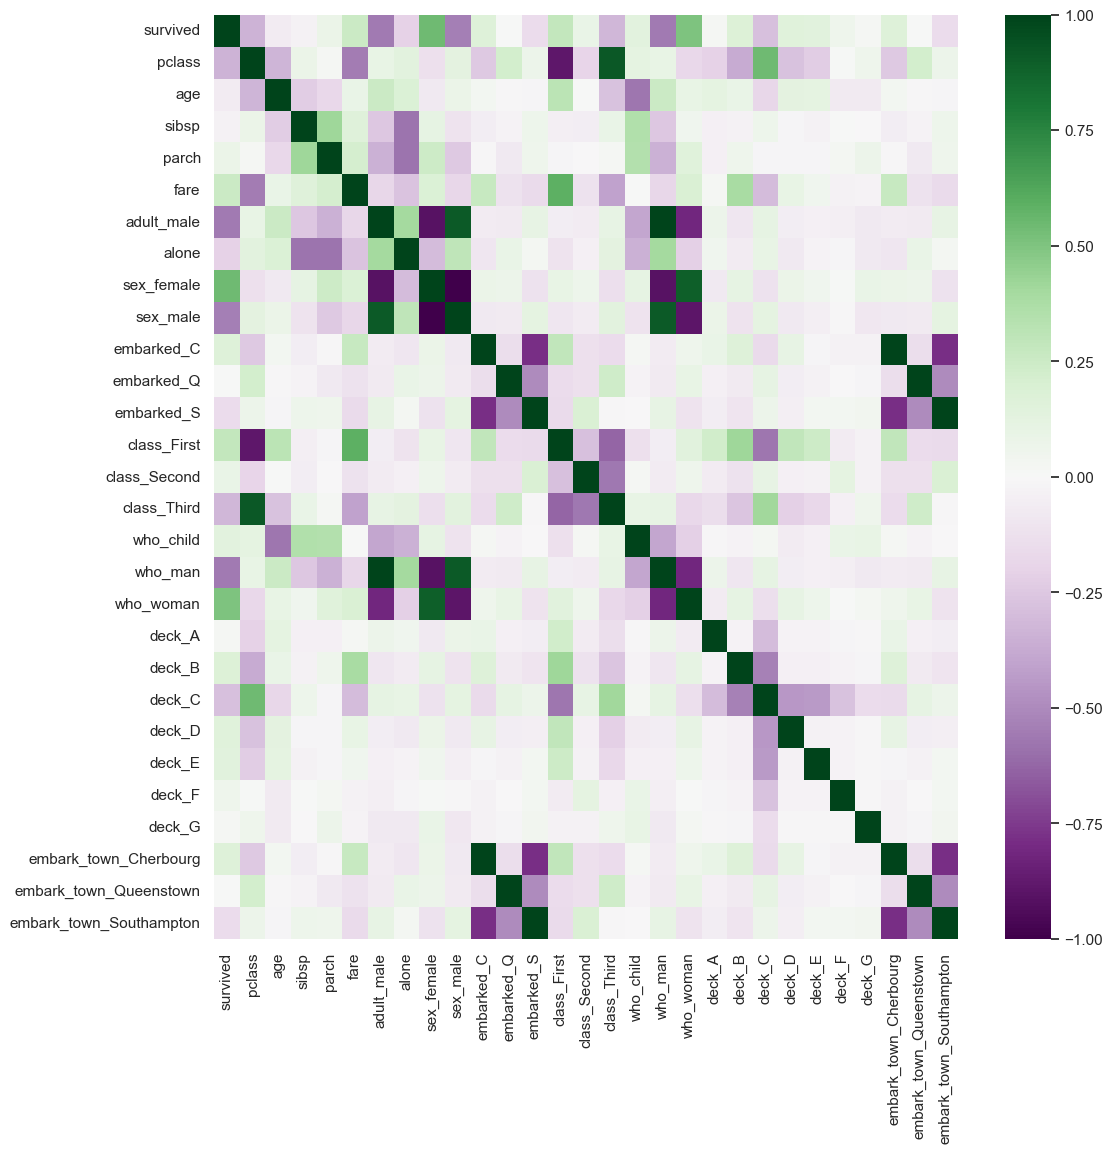

In [11]:
sns.heatmap(df.corr(), cmap='PRGn');

In [12]:
vals = df.values.astype(np.float64) # get numeric array
X = vals[:,1:] # get X
Y = vals[:,0] # get Y
X.shape, Y.shape

((891, 28), (891,))

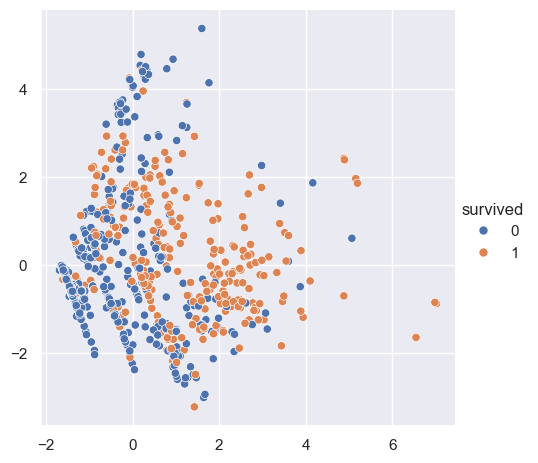

In [13]:
pca = sklearn.decomposition.PCA(n_components=5)
newx = pca.fit_transform(X)
sns.relplot(x=newx[:,0], y=newx[:,1], hue=df.survived);

In [17]:
newx.shape

(891, 5)

In [18]:
# Sample DataFrame
data = {
    'Datetime': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-08', '2023-01-10'],
    'Customer_ID': [1537, 1537, 1537, 1537, 1537],
    'Transaction_Amount': [100, 200, 150, 300, 250]
}

transactions_df = pd.DataFrame(data)
transactions_df['Datetime'] = pd.to_datetime(transactions_df['Datetime'])
transactions_df

,Datetime,Customer_ID,Transaction_Amount
0,2023-01-01,1537,100
1,2023-01-03,1537,200
2,2023-01-05,1537,150
3,2023-01-08,1537,300
4,2023-01-10,1537,250


In [47]:
transactions_df.set_index('Datetime')['Transaction_Amount'].rolling('3D').agg(['count','mean'])


,count,mean
Datetime,,
2023-01-01,1.0,100.0
2023-01-03,2.0,150.0
2023-01-05,2.0,175.0
2023-01-08,1.0,300.0
2023-01-10,2.0,275.0


In [28]:
transactions_df.groupby('Customer_ID')['Datetime'].rolling

<bound method GroupBy.rolling of <pandas.core.groupby.generic.SeriesGroupBy object at 0x1844906d0>>

In [29]:
pd.core.groupby.DataFrameGroupBy.rolling??

Signature: pd.core.groupby.DataFrameGroupBy.rolling(self, *args, **kwargs) -> 'RollingGroupby'
Source:   
    @final
    def rolling(self, *args, **kwargs) -> RollingGroupby:
        """
        Return a rolling grouper, providing rolling functionality per group.

        Parameters
        ----------
        window : int, timedelta, str, offset, or BaseIndexer subclass
            Size of the moving window.

            If an integer, the fixed number of observations used for
            each window.

            If a timedelta, str, or offset, the time period of each window. Each
            window will be a variable sized based on the observations included in
            the time-period. This is only valid for datetimelike indexes.
            To learn more about the offsets & frequency strings, please see `this link
            <https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases>`__.

            If a BaseIndexer subclass, the window boundaries
 

In [52]:
data = [
    ['2023-01-01 00:00:00', 1, 53.68],
    ['2023-01-02 00:00:00', 1, 37.77],
    ['2023-01-02 00:00:00', 1, 162.73],
    ['2023-01-03 00:00:00', 1, 455.63],
    ['2023-01-03 00:00:00', 1, 396.22],
    ['2023-01-04 00:00:00', 1, 245.49],
    ['2023-01-04 00:00:00', 1, 464.62],
    ['2023-01-05 00:00:00', 1, 152.11],
    ['2023-01-05 00:00:00', 1, 167.70],
    ['2023-01-06 00:00:00', 1, 209.07],
    ['2023-01-01 00:00:00', 2, 208.28],
    ['2023-01-02 00:00:00', 2, 261.14],
    ['2023-01-02 00:00:00', 2, 473.99],
    ['2023-01-03 00:00:00', 2, 123.78],
    ['2023-01-04 00:00:00', 2, 452.87],
    ['2023-01-04 00:00:00', 2, 156.83],
    ['2023-01-05 00:00:00', 2, 261.48],
    ['2023-01-06 00:00:00', 2, 102.33],
    ['2023-01-06 00:00:00', 2, 152.25],
    ['2023-01-07 00:00:00', 2, 60.50],
    ['2023-01-01 00:00:00', 3, 90.62],
    ['2023-01-02 00:00:00', 3, 147.36],
    ['2023-01-02 00:00:00', 3, 34.08],
    ['2023-01-03 00:00:00', 3, 457.00],
    ['2023-01-03 00:00:00', 3, 334.70],
    ['2023-01-04 00:00:00', 3, 173.53],
    ['2023-01-04 00:00:00', 3, 84.95],
    ['2023-01-05 00:00:00', 3, 411.96],
    ['2023-01-06 00:00:00', 3, 294.86],
    ['2023-01-06 00:00:00', 3, 425.83]
]

for row in data:
    row[0] = pd.to_datetime(row[0])

# Create DataFrame
df = pd.DataFrame(data, columns=['date', 'cid', 'tx'])

df


,date,cid,tx
0,2023-01-01,1,53.68
1,2023-01-02,1,37.77
2,2023-01-02,1,162.73
3,2023-01-03,1,455.63
4,2023-01-03,1,396.22
5,2023-01-04,1,245.49
6,2023-01-04,1,464.62
7,2023-01-05,1,152.11
8,2023-01-05,1,167.70
9,2023-01-06,1,209.07


AttributeError: 'Series' object has no attribute 'set_index'

In [81]:
def foo(df):
    df = df.set_index('date')
    df['tx_count'] = df['tx'].rolling('2D').count()
    df['tx_sum'] = df['tx'].rolling('2D').sum()
    df['tx_mean'] = df.tx_sum / df.tx_count
    return df.drop(columns='tx_sum')

In [82]:
df.groupby('cid').apply(foo)

cid      tx  tx_count     tx_mean
cid date                                         
1   2023-01-01    1   53.68       1.0   53.680000
    2023-01-02    1   37.77       2.0   45.725000
    2023-01-02    1  162.73       3.0   84.726667
    2023-01-03    1  455.63       3.0  218.710000
    2023-01-03    1  396.22       4.0  263.087500
    2023-01-04    1  245.49       3.0  365.780000
    2023-01-04    1  464.62       4.0  390.490000
    2023-01-05    1  152.11       3.0  287.406667
    2023-01-05    1  167.70       4.0  257.480000
    2023-01-06    1  209.07       3.0  176.293333
2   2023-01-01    2  208.28       1.0  208.280000
    2023-01-02    2  261.14       2.0  234.710000
    2023-01-02    2  473.99       3.0  314.470000
    2023-01-03    2  123.78       3.0  286.303333
    2023-01-04    2  452.87       2.0  288.325000
    2023-01-04    2  156.83       3.0  244.493333
    2023-01-05    2  261.48       3.0  290.393333
    2023-01-06    2  102.33       2.0  181.905000
    2023-01-06    2  152.25       3.0  172.020000
    2023-01-07    2   60.50       3.0  105.026667
3   2023-01-01    3   90.62       1.0   90.620000
    2023-01-02    3  147.36       2.0  118.990000
    2023-01-02    3   34.08       3.0   90.686667
    2023-01-03    3  457.00       3.0  212.813333
    2023-01-03    3  334.70       4.0  243.285000
    2023-01-04    3  173.53       3.0  321.743333
    2023-01-04    3   84.95       4.0  262.545000
    2023-01-05    3  411.96       3.0  223.480000
    2023-01-06    3  294.86       2.0  353.410000
    2023-01-06    3  425.83       3.0  377.550000